In [21]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
df = pd.read_csv("./data/pima-indians-diabetes.csv",  
                 names= ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin',
                           'BMI', 'predigree', 'age', 'class'])

In [7]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,predigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,predigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# 과거 임신 횟수에 따른 당뇨 여부
print(df[['pregnant', 'class']].groupby(['pregnant'], as_index = False).mean().sort_values(by='pregnant', ascending = True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


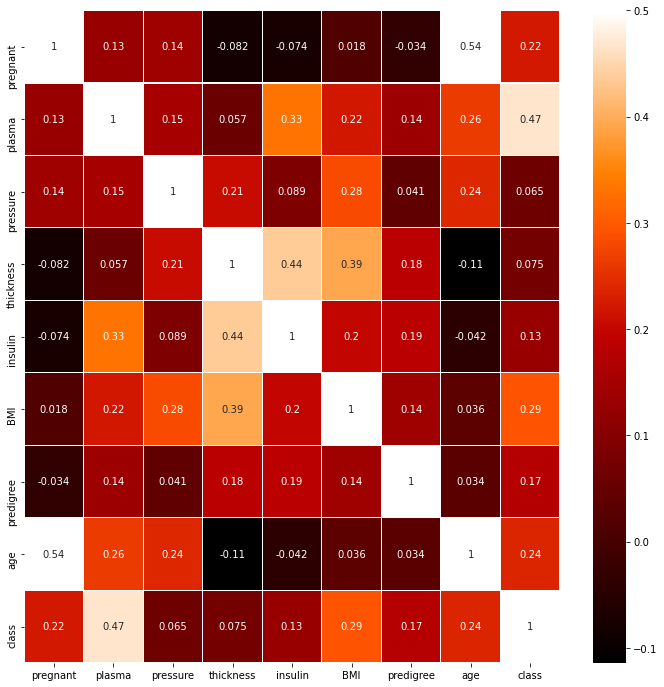

In [15]:
# 데이터 간의 상관관계를 그래프로 표현
colormap = plt.cm.gist_heat # 그래프의 색상 구성 setting
plt.figure(figsize=(12, 12)) # 그래프의 크기 setting

# 그래프의 속성을 결정, vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시
sns.heatmap(df.corr(),linewidths=0.1, vmax = 0.5, cmap = colormap, 
            linecolor="white", annot = True)
plt.show()

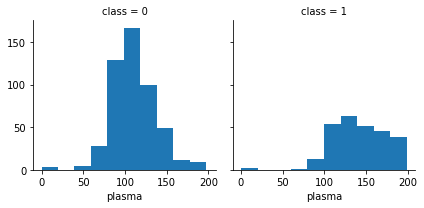

In [16]:
gird = sns.FacetGrid(df, col = 'class')
gird.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [34]:
# Sequential = tf.keras.models.Sequential
# Dense = tf.keras.layers.Dense

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import PReLU
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [45]:
# seed값 생성
np.random.seed(3)
tf.random.set_seed(3)

In [55]:
dataset = np.loadtxt("./data/pima-indians-diabetes.csv", delimiter = ',')
X = dataset[:,0:8]
Y = dataset[:,8]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 156)b

In [83]:
prelu=PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None)


In [89]:
# model setting
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = prelu))
model.add(Dense(1, activation = 'sigmoid'))

In [85]:
# model compile
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, epochs=200, batch_size = 10)

Epoch 1/200
62/62 [==============================] - 0s 586us/step - loss: 1.7257 - accuracy: 0.5570
Epoch 2/200
62/62 [==============================] - 0s 579us/step - loss: 0.7747 - accuracy: 0.6221
Epoch 3/200
62/62 [==============================] - 0s 584us/step - loss: 0.7231 - accuracy: 0.6564
Epoch 4/200
62/62 [==============================] - 0s 667us/step - loss: 0.6915 - accuracy: 0.6694
Epoch 5/200
62/62 [==============================] - 0s 727us/step - loss: 0.6703 - accuracy: 0.6645
Epoch 6/200
62/62 [==============================] - 0s 754us/step - loss: 0.6402 - accuracy: 0.6889
Epoch 7/200
62/62 [==============================] - 0s 727us/step - loss: 0.6306 - accuracy: 0.6808
Epoch 8/200
62/62 [==============================] - 0s 732us/step - loss: 0.6129 - accuracy: 0.7020
Epoch 9/200
62/62 [==============================] - 0s 719us/step - loss: 0.5934 - accuracy: 0.7068
Epoch 10/200
62/62 [==============================] - 0s 730us/step - loss: 0.5890 - accura

62/62 [==============================] - 0s 576us/step - loss: 0.5013 - accuracy: 0.7394
Epoch 82/200
62/62 [==============================] - 0s 553us/step - loss: 0.4904 - accuracy: 0.7427
Epoch 83/200
62/62 [==============================] - 0s 548us/step - loss: 0.5070 - accuracy: 0.7313
Epoch 84/200
62/62 [==============================] - 0s 551us/step - loss: 0.4921 - accuracy: 0.7427
Epoch 85/200
62/62 [==============================] - 0s 540us/step - loss: 0.4913 - accuracy: 0.7378
Epoch 86/200
62/62 [==============================] - 0s 541us/step - loss: 0.4898 - accuracy: 0.7573
Epoch 87/200
62/62 [==============================] - 0s 547us/step - loss: 0.4852 - accuracy: 0.7524
Epoch 88/200
62/62 [==============================] - 0s 553us/step - loss: 0.4882 - accuracy: 0.7378
Epoch 89/200
62/62 [==============================] - 0s 550us/step - loss: 0.4950 - accuracy: 0.7492
Epoch 90/200
62/62 [==============================] - 0s 568us/step - loss: 0.4882 - accuracy: 

62/62 [==============================] - 0s 561us/step - loss: 0.4674 - accuracy: 0.7655
Epoch 161/200
62/62 [==============================] - 0s 577us/step - loss: 0.4667 - accuracy: 0.7736
Epoch 162/200
62/62 [==============================] - 0s 584us/step - loss: 0.4685 - accuracy: 0.7704
Epoch 163/200
62/62 [==============================] - 0s 656us/step - loss: 0.4586 - accuracy: 0.7720
Epoch 164/200
62/62 [==============================] - 0s 710us/step - loss: 0.4585 - accuracy: 0.7671
Epoch 165/200
62/62 [==============================] - 0s 695us/step - loss: 0.4619 - accuracy: 0.7769
Epoch 166/200
62/62 [==============================] - 0s 670us/step - loss: 0.4608 - accuracy: 0.7704
Epoch 167/200
62/62 [==============================] - 0s 634us/step - loss: 0.4620 - accuracy: 0.7655
Epoch 168/200
62/62 [==============================] - 0s 636us/step - loss: 0.4603 - accuracy: 0.7704
Epoch 169/200
62/62 [==============================] - 0s 568us/step - loss: 0.4588 - a

In [87]:
print("\n Accuracy: % .4f" %(model.evaluate(X_test, y_test)[1]))

5/5 [==============================] - 0s 707us/step - loss: 0.7159 - accuracy: 0.7338

 Accuracy:  0.7338


## 머신러닝

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [65]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [66]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.6623
RandomForestClassifier 정확도:0.7403
LogisticRegression 정확도: 0.7597


/Users/hosung/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
